## 회귀 문제 DNN으로 학습시키기: Diabetes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from keras import optimizers
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn import datasets
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

### 퍼셉트론
퍼셉트론(perceptron)은 인공신경망의 한 종류로서, 1957년에 코넬 항공 연구소(Cornell Aeronautical Lab)의 프랑크 로젠블라트 (Frank Rosenblatt)에 의해 고안되었다. 가장 고전적인 선형 분류 모델이고 실용적으로 많이 사용하지는 않지만, 퍼셉트론 모델은 분류 문제의 해법을 이해하기 가장 쉬운 모델이면서 서포트 벡터 머신이나 딥 러닝 등의 강력한 모델들이 모두 퍼셉트론의 변형으로 배울 가치가 있다.

두 개의 노드가 있을 경우, 그 두 개의 노드가 각각 들어가야 하는 위치인 입력치와 그를 가중하는 가중치, 이를 통해 계산하여 나온 결과인 출력 값으로 구성되어 있다.

- 처음 입력 갯수: 활성화 합수는 다음 레이어 넘어갈 때 출력을 처리하는 부분이다.
- 모델 튜닝을 위한 다양한 활성화 함수를 알아볼 것: relu 함수가 default고, 효율이 잘 나오는 편
- 퍼셉트론 갯수는 학습이 잘되는 양을 실험적으로 찾아보아야 함.
- 단, 중간 층의 갯수가 많더라도, 결국에는 최종 출력하는 퍼셉트론과 갯수가 비슷해져야 한다.
- 레이어가 많고 퍼셉트론이 많다고 해서 정교한 학습 모델이 되는 것은 아니다.

In [2]:
## load_diabetes
diabetes = load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    random_state=1, test_size=0.25)

## 모델 정의: DNN
model = Sequential()

model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1)) # 최종 출력 1: 회귀 분석이므로

# 모델 학습
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
ret=model.fit(x_train, y_train, batch_size=20, epochs=500)

Epoch 1/500
17/17 [==============================] - 0s 0s/step - loss: 153.6493 - mae: 153.6493
Epoch 2/500
17/17 [==============================] - 0s 1ms/step - loss: 153.6308 - mae: 153.6308
Epoch 3/500
17/17 [==============================] - 0s 0s/step - loss: 153.6138 - mae: 153.6138
Epoch 4/500
17/17 [==============================] - 0s 1ms/step - loss: 153.5968 - mae: 153.5968
Epoch 5/500
17/17 [==============================] - 0s 0s/step - loss: 153.5798 - mae: 153.5798
Epoch 6/500
17/17 [==============================] - 0s 1ms/step - loss: 153.5628 - mae: 153.5628
Epoch 7/500
17/17 [==============================] - 0s 501us/step - loss: 153.5457 - mae: 153.5457
Epoch 8/500
17/17 [==============================] - 0s 476us/step - loss: 153.5251 - mae: 153.5251
Epoch 9/500
17/17 [==============================] - 0s 17us/step - loss: 153.4943 - mae: 153.4943
Epoch 10/500
17/17 [==============================] - 0s 0s/step - loss: 153.4470 - mae: 153.4470
Epoch 11/500
17/17

1/1 [==============================] - 0s 33ms/step


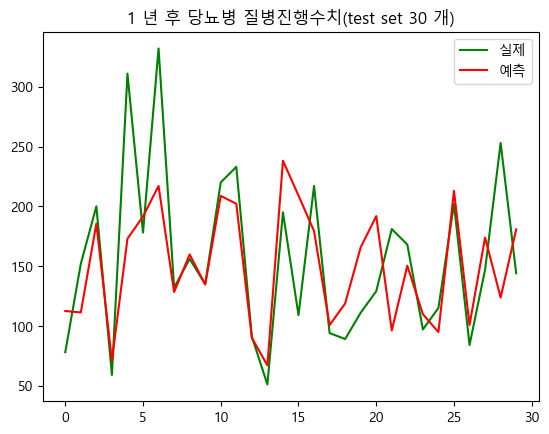

4/4 [==============================] - 0s 0s/step - loss: 42.2856 - mae: 42.2856
[42.285621643066406, 42.285621643066406]


In [3]:
## 학습모델 평가 및 예측
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
y_predict=model.predict(x_test[:30, :]) # 예측
plt.figure()
plt.title('1 년 후 당뇨병 질병진행수치(test set 30 개)')
plt.plot(y_test[:30], 'g', label='실제')
plt.plot(y_predict, 'r', label='예측')
plt.legend()
plt.show()

score=model.evaluate(x_test, y_test)
print(score)

## 분류 문제 DNN으로 훈련시키기: Breast Cancer

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from keras import optimizers
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn import datasets

In [5]:
# 학습 모델 정의 및 학습
## sklearn에 내장되어 있는 유방암데이터 로드
cancer = load_breast_cancer()

## 데이터를 불러오고 학습 데이터와 테스트데이터를 분류
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=60)

## 모델 정의
model = Sequential()

model.add(Dense(12, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## 모델 학습
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ret=model.fit(x_train, y_train,batch_size=20,epochs=500)

Epoch 1/500
22/22 [==============================] - 0s 310us/step - loss: 5.9290 - accuracy: 0.5329
Epoch 2/500
22/22 [==============================] - 0s 87us/step - loss: 0.8323 - accuracy: 0.7934
Epoch 3/500
22/22 [==============================] - 0s 744us/step - loss: 0.4019 - accuracy: 0.8803
Epoch 4/500
22/22 [==============================] - 0s 0s/step - loss: 0.3402 - accuracy: 0.8826
Epoch 5/500
22/22 [==============================] - 0s 0s/step - loss: 0.3020 - accuracy: 0.8920
Epoch 6/500
22/22 [==============================] - 0s 744us/step - loss: 0.3006 - accuracy: 0.8944
Epoch 7/500
22/22 [==============================] - 0s 744us/step - loss: 0.3771 - accuracy: 0.8638
Epoch 8/500
22/22 [==============================] - 0s 0s/step - loss: 0.3491 - accuracy: 0.8779
Epoch 9/500
22/22 [==============================] - 0s 986us/step - loss: 0.4745 - accuracy: 0.8474
Epoch 10/500
22/22 [==============================] - 0s 286us/step - loss: 0.2936 - accuracy: 0.9038

### 활성화 함수?
-> Sigmoid, tanh, LeakyReLU, PReLU
- 가장 많이 사용되는 것은 ReLU

5/5 [==============================] - 0s 0s/step


C:\Users\USER\AppData\Local\Temp\ipykernel_7840\3434268205.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_result[i] = y_test[i] - y_predict[i]


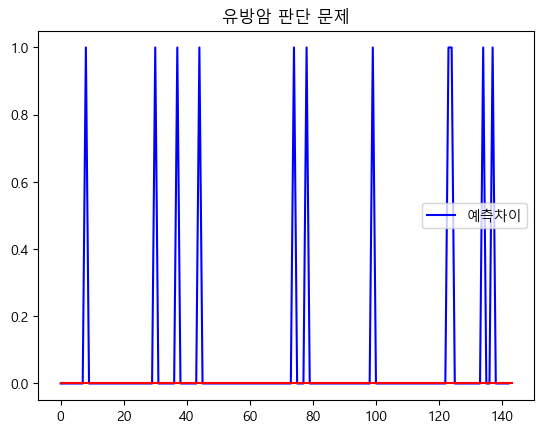

In [6]:
# 학습 모델 평가 및 예측

## 정답, 예측, 차이 테이블, 클래스는 0과 1
y_predict = model.predict(x_test)
y_predict = y_predict.round()

y_result = np.zeros(y_test.size)
for i in range(y_test.size):
    y_result[i] = y_test[i] - y_predict[i]

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plt.title('유방암 판단 문제')
plt.plot(y_result, 'b', label='예측차이')
plt.plot([0, y_result.size], [0, 0], 'r')
plt.legend()
plt.show()

## 분류 문제 DNN으로 학습시키기: Iris

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from keras import optimizers
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn import datasets

In [8]:
# 학습 모델 정의 및 학습
## sklearn에 내장되어 있는 유방암데이터 로드
iris = load_iris()

## 데이터를 불러오고 학습 데이터와 테스트데이터를 분류
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=60)

## 모델 정의
model = Sequential()

model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

## 모델 학습
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ret=model.fit(x_train, y_train,batch_size=20,epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 2ms/step - loss: 1.0979 - accuracy: 0.4018
Epoch 2/500
6/6 [==============================] - 0s 0s/step - loss: 0.9573 - accuracy: 0.6607
Epoch 3/500
6/6 [==============================] - 0s 0s/step - loss: 0.8737 - accuracy: 0.6607
Epoch 4/500
6/6 [==============================] - 0s 0s/step - loss: 0.8139 - accuracy: 0.6607
Epoch 5/500
6/6 [==============================] - 0s 322us/step - loss: 0.7576 - accuracy: 0.6607
Epoch 6/500
6/6 [==============================] - 0s 0s/step - loss: 0.7029 - accuracy: 0.6786
Epoch 7/500
6/6 [==============================] - 0s 0s/step - loss: 0.6513 - accuracy: 0.7321
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 0.5997 - accuracy: 0.7946
Epoch 9/500
6/6 [==============================] - 0s 0s/step - loss: 0.5493 - accuracy: 0.8661
Epoch 10/500
6/6 [==============================] - 0s 0s/step - loss: 0.5011 - accuracy: 0.9196
Epoch 11/500
6/6 [================

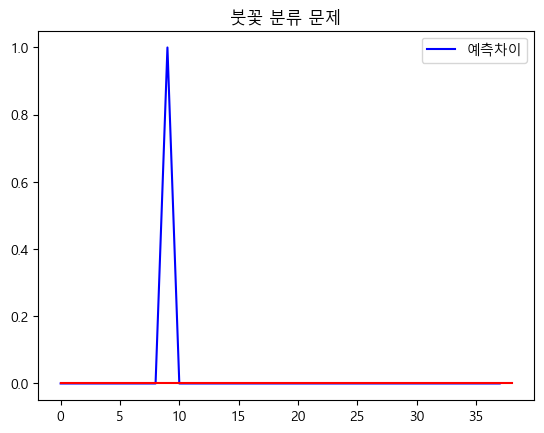

In [9]:
# 학습 모델 평가 및 예측

## 정답, 예측, 차이 테이블, 클래스는 0과 1, 2
## argmax를 막아보고 프린트해보면 predict 성격을 알 수 있음.
y_predict = model.predict(x_test, verbose=0)
y_predict = y_predict.argmax(axis=1)

y_result = np.zeros(y_test.size)
for i in range(y_test.size):
    y_result[i] = y_test[i] - y_predict[i]

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plt.title('붓꽃 분류 문제')
plt.plot(y_result, 'b', label='예측차이')
plt.plot([0, y_result.size], [0, 0], 'r')
plt.legend()
plt.show()

## 인코딩 기법1: Label Encoding
### Diamond Data

In [10]:
import pandas as pd
csv_dia = pd.read_csv('./data/diamonds.csv')

In [11]:
# cut, color, clarity는 수치가 아닌 레이블 값임
print("cut: ", csv_dia.cut.unique())
print("color: ", csv_dia.color.unique())
print("clarity: ", csv_dia.clarity.unique())

## 라벨링: 이산 데이터를 숫자로 매핑하기
### cut/color/clarity 모두 등급에 따라 점수 부여가 가능하다, 즉 어떤게 더 좋은지 라벨링할 수 있다.
map1 = {'Ideal': 4, 'Premium': 3, 'Good': 2, 'Very Good': 1, 'Fair': 0}
map2 = { "D": 6, "E": 5, "F": 4, "G": 3, "H": 2, "I": 1, "J": 0 }
map3 = { "I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7 }
csv_dia.cut = csv_dia.cut.map(map1)
csv_dia.color = csv_dia.color.map(map2)
csv_dia.clarity = csv_dia.clarity.map(map3)

print(csv_dia)

cut:  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color:  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
       carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    4      5        1   61.5   55.0    326  3.95  3.98  2.43
1       0.21    3      5        2   59.8   61.0    326  3.89  3.84  2.31
2       0.23    2      5        4   56.9   65.0    327  4.05  4.07  2.31
3       0.29    3      1        3   62.4   58.0    334  4.20  4.23  2.63
4       0.31    2      0        1   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
49995   0.72    4      6        2   60.8   57.0   2757  5.75  5.76  3.50
49996   0.72    2      6        2   63.1   55.0   2757  5.69  5.75  3.61
49997   0.70    1      6        2   62.8   60.0   2757  5.66  5.68  3.56
49998   0.86    3      2        1   61.0   58.0   2757  6.15  6.12  3.74
49999   0.75    4      6        1   62.2   55.0

### Notebook Data

In [12]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_cleaned = pd.read_csv("./data/notebook/cleaned.csv")

In [13]:
label_encoder_gpu = LabelEncoder()
label_encoder_gpu_type = LabelEncoder()

df_cleaned['GPU_Label'] = label_encoder_gpu.fit_transform(df_cleaned['GPU'])
df_cleaned['GPU_Type_Label'] = label_encoder_gpu.fit_transform(df_cleaned['GPU_Type'])

# 생략 없이 출력하도록 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

x = pd.concat([df_cleaned['GPU'], df_cleaned['GPU_Label']], axis=1)
x = pd.concat([x, df_cleaned['GPU_Type']], axis=1)
x = pd.concat([x, df_cleaned['GPU_Type_Label']], axis=1)

print(x)

                                                    GPU  GPU_Label                        GPU_Type  GPU_Type_Label
0                                 Intel HD Graphics 520         52    Integrated/On-Board Graphics               2
1                                Intel UHD Graphics 620         82    Integrated/On-Board Graphics               2
2                                Intel Iris Xe Graphics         78    Integrated/On-Board Graphics               2
3                                Intel Iris Xe Graphics         78    Integrated/On-Board Graphics               2
4                                Intel Iris Xe Graphics         78    Integrated/On-Board Graphics               2
5                                Intel Iris Xe Graphics         78    Integrated/On-Board Graphics               2
6                                Intel Iris Xe Graphics         78    Integrated/On-Board Graphics               2
7                                 Intel HD Graphics 620         58    Integrated

## 인코딩 기법2: One Hot Encoding
### 붓꽃 데이터

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

## test/train 분리
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :4], df['target'],
                                                    stratify=df['target'], test_size=0.1, random_state=30)

## 모델 정의
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

## 모델 학습 설정
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## 모델 학습
results = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
score = model.evaluate(x_train, y_train)
print('evaluate scoer(train): ', score)

Epoch 1/100
11/11 [==============================] - 0s 7ms/step - loss: 0.9980 - accuracy: 0.3704 - val_loss: 0.9432 - val_accuracy: 0.4444
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9469 - accuracy: 0.3796 - val_loss: 0.8853 - val_accuracy: 0.4074
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.9252 - accuracy: 0.3241 - val_loss: 0.8691 - val_accuracy: 0.4074
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.9264 - accuracy: 0.3519 - val_loss: 0.8579 - val_accuracy: 0.4074
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8843 - accuracy: 0.3426 - val_loss: 0.8093 - val_accuracy: 0.4444
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8608 - accuracy: 0.3426 - val_loss: 0.8346 - val_accuracy: 0.5185
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8297 - accuracy: 0.5741 - val_loss: 0.8092 - val_accuracy: 0.7778
Epoch 8/100
1

In [16]:
import pandas as pd
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
import numpy as np
from keras.utils import np_utils
from keras import utils

In [17]:
# 붓꽃 종류는 0, 1, 2
## 원 핫 인코딩: 0:[1, 0, 0], 1:[0, 1, 0], 2:[0, 0, 1]

iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

## test/train 분리
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :4], df['target'],
                                                    stratify=df['target'], test_size=0.1, random_state=30)

## 원핫 인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


## 모델 정의
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

## 모델 학습 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## 모델 학습
results = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
score = model.evaluate(x_train, y_train)
print('evaluate scoer(train): ', score)

Epoch 1/100
11/11 [==============================] - 0s 9ms/step - loss: 1.1716 - accuracy: 0.3148 - val_loss: 1.0243 - val_accuracy: 0.4074
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 1.0041 - accuracy: 0.3333 - val_loss: 1.0093 - val_accuracy: 0.2593
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9588 - accuracy: 0.3333 - val_loss: 0.9378 - val_accuracy: 0.4444
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.9058 - accuracy: 0.5926 - val_loss: 0.8864 - val_accuracy: 0.5556
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8505 - accuracy: 0.6852 - val_loss: 0.8373 - val_accuracy: 0.5926
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8013 - accuracy: 0.6759 - val_loss: 0.8104 - val_accuracy: 0.5926
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7619 - accuracy: 0.6944 - val_loss: 0.7450 - val_accuracy: 0.6296
Epoch 8/100
1

## 표준화와 정규화
### 붓꽃 데이터
- 표준화와 정규화, 그리고 둘 다 하지 않은 데이터를 가지고 같은 모델을 돌렸을 때 어떤 결과가 나오는지 비교해 보았다.
- 붓꽃 데이터의 경우 row 데이터 자체가 feature간 값의 차이가 적고, 필드 내에서도 데이터가 고르게 분포되어 있기 때문에 큰 차이가 나타나지는 않는다.

In [18]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler

iris = load_iris()
x = iris.data
y = iris.target

print(x)
print("=" * 80)
## 정규화
x_normalization = MinMaxScaler().fit_transform(x)
print(x_normalization)
print("="*80)
## 표준화
x_standarization = StandardScaler().fit_transform(x)
print(x_standarization)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [19]:
import pandas as pd
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import time
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df_normal = pd.DataFrame(MinMaxScaler().fit_transform(iris['data']), columns=iris['feature_names'])
df_normal['target'] = iris['target']
df_standard = pd.DataFrame(StandardScaler().fit_transform(iris['data']), columns=iris['feature_names'])
df_standard['target'] = iris['target']

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :4], df['target'],
                                                    stratify=df['target'], test_size=0.1, random_state=30)
x_train_normal, x_test_normal, y_train_normal, y_test_normal = train_test_split(df_normal.iloc[:, :4], df_normal['target'],
                                                    stratify=df_normal['target'], test_size=0.1, random_state=30)
x_train_standard, x_test_standard, y_train_standard, y_test_standard = train_test_split(df_standard.iloc[:, :4], df_standard['target'],
                                                    stratify=df_standard['target'], test_size=0.1, random_state=30)

In [20]:
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

# 정규화 모델 ==============================================================================
print("="* 80)
start = time.time() ## 시간 측정

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
result = model.fit(x_train_normal, y_train_normal, validation_split=0.2, epochs=1000,
                   batch_size=10, verbose=0)
score = model.evaluate(x_train_normal, y_train_normal, verbose=0)
print('Normalization')
print('Train loss: ', score[0])
print('Train Accuracy: ', score[1])
t2 = time.time() - start
print("=" * 80)
# 표준화 모델 ==============================================================================
start = time.time()

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
result = model.fit(x_train_standard, y_train_standard, validation_split=0.2, epochs=1000,
                   batch_size=10, verbose=0)
score = model.evaluate(x_train_standard, y_train_standard, verbose=0)
print('Standardization')
print('Train loss: ', score[0])
print('Train Accuracy: ', score[1])
t3 = time.time() - start
print("=" * 80)
# 비처리 모델 ==============================================================================
start = time.time()

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
result = model.fit(x_train, y_train, validation_split=0.2, epochs=1000,
                   batch_size=10, verbose=0)
score = model.evaluate(x_train, y_train, verbose=0)
print('Without Standardization nor Normalization')
print('Train loss: ', score[0])
print('Train Accuracy: ', score[1])
t1 = time.time() - start
print("=" * 80)

# 통계
print("비정규화 실행 시간: ", t1)
print("정규화 실행 시간: ", t2)
print("표준화 실행 시간: ", t3)
print("="* 80)

Normalization
Train loss:  0.0397145114839077
Train Accuracy:  0.9777777791023254
Standardization
Train loss:  0.15401042997837067
Train Accuracy:  0.9777777791023254
Without Standardization nor Normalization
Train loss:  0.05029863864183426
Train Accuracy:  0.9777777791023254
비정규화 실행 시간:  33.14396572113037
정규화 실행 시간:  16.578823566436768
표준화 실행 시간:  17.57985019683838


## Kaggle 에서 가져와 Scikit learn으로 학습해보기
### Regression: Boston Housing Dataset

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [63]:
df = pd.read_csv('./data/BostonHousing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [64]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [65]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [66]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     501 non-null    float64
 1   zn       501 non-null    float64
 2   indus    501 non-null    float64
 3   chas     501 non-null    int64  
 4   nox      501 non-null    float64
 5   rm       501 non-null    float64
 6   age      501 non-null    float64
 7   dis      501 non-null    float64
 8   rad      501 non-null    int64  
 9   tax      501 non-null    int64  
 10  ptratio  501 non-null    float64
 11  b        501 non-null    float64
 12  lstat    501 non-null    float64
 13  medv     501 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 58.7 KB


In [67]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [68]:
x = df.drop('medv', axis=1)  # 특성 열
y = df['medv']               # 타겟 열

In [69]:
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.25)
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)
x_train = scaler.fit_transform(x_train)


print("Shape of the train dataset features")
print(x_train.shape)
print("Shape of the test dataset features")
print(x_test.shape)
print("Shape of the train dataset target")
print(y_train.shape)
print("Shape of the test dataset target")
print(y_test.shape)

Shape of the train dataset features
(375, 13)
Shape of the test dataset features
(126, 13)
Shape of the train dataset target
(375,)
Shape of the test dataset target
(126,)


In [70]:
## 모델 정의: DNN
model = Sequential()

model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1)) # 최종 출력 1: 회귀 분석이므로

# 모델 학습
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
ret = model.fit(x_train, y_train, epochs=200,
                    validation_split=0.2, batch_size=64)

Epoch 1/200
5/5 [==============================] - 0s 17ms/step - loss: 23.2022 - mae: 23.2022 - val_loss: 21.7865 - val_mae: 21.7865
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 23.0913 - mae: 23.0913 - val_loss: 21.6377 - val_mae: 21.6377
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 22.9275 - mae: 22.9275 - val_loss: 21.4255 - val_mae: 21.4255
Epoch 4/200
5/5 [==============================] - 0s 4ms/step - loss: 22.6923 - mae: 22.6923 - val_loss: 21.1266 - val_mae: 21.1266
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 22.3544 - mae: 22.3544 - val_loss: 20.7268 - val_mae: 20.7268
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 21.9052 - mae: 21.9052 - val_loss: 20.1820 - val_mae: 20.1820
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 21.2719 - mae: 21.2719 - val_loss: 19.4152 - val_mae: 19.4152
Epoch 8/200
5/5 [==============================] - 0s 5ms/step - los

4/4 [==============================] - 0s 5ms/step


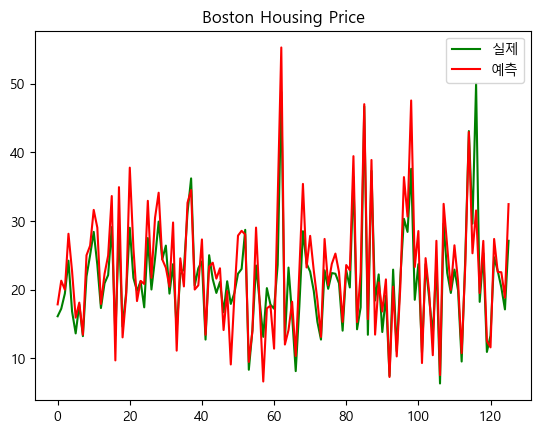

4/4 [==============================] - 0s 5ms/step - loss: 2.9098 - mae: 2.9098


In [71]:
df_reset = y_test.reset_index(drop=True)

## 학습모델 평가 및 예측
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
y_predict=model.predict(x_test[:]) # 예측
plt.figure()
plt.title('Boston Housing Price')
plt.plot(df_reset[:], 'g', label='실제')
plt.plot(y_predict, 'r', label='예측')
plt.legend()
plt.show()

score=model.evaluate(x_test, df_reset)

In [72]:
test_loss, test_mae = model.evaluate(x_test, y_test)
print('loss:{:.3f}\nmae: {:.3f}'.format(test_loss, test_mae))

4/4 [==============================] - 0s 0s/step - loss: 2.9098 - mae: 2.9098
loss:2.910
mae: 2.910


### Judgement: Pima Indian Diabetes Dataset

In [114]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential

In [115]:
# 학습 모델 정의 및 학습
## sklearn에 내장되어 있는 유방암데이터 로드
pima = pd.read_csv('./data/diabetes.csv')

In [116]:
df_shuffled = pima.iloc[np.random.permutation(pima.index)].reset_index(drop=True)

In [119]:
x = df_shuffled.drop('Outcome', axis=1)  # 특성 열
y = df_shuffled['Outcome']

In [147]:
## 데이터를 불러오고 학습 데이터와 테스트데이터를 분류
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=90)

In [148]:
print(y_train.value_counts())
print(y_test.value_counts())

Outcome
0    382
1    194
Name: count, dtype: int64
Outcome
0    118
1     74
Name: count, dtype: int64


In [149]:
## 모델 정의
model = Sequential()

model.add(Dense(12, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## 모델 학습
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ret=model.fit(x_train, y_train,batch_size=50,epochs=500, validation_split=0.2)

Epoch 1/500
10/10 [==============================] - 0s 9ms/step - loss: 1.3483 - accuracy: 0.6043 - val_loss: 0.7829 - val_accuracy: 0.4914
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.7817 - accuracy: 0.5435 - val_loss: 0.7440 - val_accuracy: 0.6207
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6196 - val_loss: 0.5975 - val_accuracy: 0.6638
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.6696 - val_loss: 0.6240 - val_accuracy: 0.6810
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.6978 - val_loss: 0.6160 - val_accuracy: 0.6724
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.6978 - val_loss: 0.6156 - val_accuracy: 0.6121
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.6739 - val_loss: 0.5798 - val_accuracy: 0.6983
Epoch 8/500
1

In [150]:
df_reset = y_test.reset_index(drop=True)
df_reset

0      1
1      1
2      1
3      0
4      0
5      0
6      1
7      0
8      1
9      0
10     1
11     0
12     0
13     0
14     1
15     0
16     1
17     1
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     1
26     1
27     0
28     1
29     0
30     1
31     1
32     1
33     0
34     0
35     1
36     1
37     0
38     0
39     1
40     0
41     1
42     0
43     1
44     1
45     0
46     0
47     0
48     0
49     1
50     1
51     0
52     0
53     1
54     1
55     0
56     0
57     0
58     0
59     0
60     0
61     1
62     0
63     1
64     0
65     0
66     0
67     1
68     1
69     1
70     1
71     0
72     0
73     0
74     0
75     0
76     0
77     1
78     1
79     1
80     1
81     1
82     1
83     0
84     0
85     0
86     0
87     0
88     1
89     1
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     1
99     1
100    0
101    0
102    1
103    0
104    0
105    1
106    0
107    1
108    0
109    1
110    0
1

6/6 [==============================] - 0s 600us/step


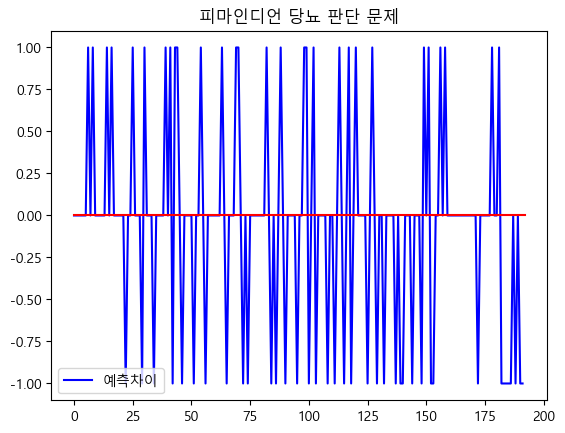

In [151]:
# 학습 모델 평가 및 예측

## 정답, 예측, 차이 테이블, 클래스는 0과 1
y_predict = model.predict(x_test)
y_predict = y_predict.round()

y_result = np.zeros(y_test.size)

for i in range(y_test.size):
    y_result[i] = df_reset[i] - y_predict[i][0]

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plt.title('피마인디언 당뇨 판단 문제')
plt.plot(y_result, 'b', label='예측차이')
plt.plot([0, y_result.size], [0, 0], 'r')
plt.legend()
plt.show()

In [152]:
score = model.evaluate(x_test, y_test)
print("Test Score", score)

6/6 [==============================] - 0s 0s/step - loss: 2.4884 - accuracy: 0.6458
Test Score [2.4883828163146973, 0.6458333134651184]


### Classification: Phone Classification Dataset

In [99]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

In [100]:
phone = pd.read_csv('./data/phone_price.csv')

In [101]:
phone.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [102]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [103]:
df_shuffled = phone.iloc[np.random.permutation(phone.index)].reset_index(drop=True)

In [104]:
x = df_shuffled.drop('price_range', axis=1)  # 특성 열
y = df_shuffled['price_range']

In [105]:
print(y.value_counts())

price_range
1    500
3    500
2    500
0    500
Name: count, dtype: int64


In [106]:
## 데이터를 불러오고 학습 데이터와 테스트데이터를 분류
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=60)

In [107]:
print(y_train.value_counts())
print(y_test.value_counts())

price_range
2    381
3    376
0    374
1    369
Name: count, dtype: int64
price_range
1    131
0    126
3    124
2    119
Name: count, dtype: int64


In [109]:
## 모델 정의
model = Sequential()

model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

## 모델 학습
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ret=model.fit(x_train, y_train,batch_size=20,epochs=500)

Epoch 1/500
75/75 [==============================] - 0s 522us/step - loss: 46.7102 - accuracy: 0.4273
Epoch 2/500
75/75 [==============================] - 0s 613us/step - loss: 6.6683 - accuracy: 0.5107
Epoch 3/500
75/75 [==============================] - 0s 486us/step - loss: 4.5643 - accuracy: 0.5233
Epoch 4/500
75/75 [==============================] - 0s 451us/step - loss: 3.8470 - accuracy: 0.5553
Epoch 5/500
75/75 [==============================] - 0s 450us/step - loss: 3.9765 - accuracy: 0.5453
Epoch 6/500
75/75 [==============================] - 0s 464us/step - loss: 2.7575 - accuracy: 0.5947
Epoch 7/500
75/75 [==============================] - 0s 430us/step - loss: 2.6003 - accuracy: 0.5707
Epoch 8/500
75/75 [==============================] - 0s 463us/step - loss: 2.4750 - accuracy: 0.5800
Epoch 9/500
75/75 [==============================] - 0s 448us/step - loss: 2.3087 - accuracy: 0.5967
Epoch 10/500
75/75 [==============================] - 0s 458us/step - loss: 2.1425 - accur

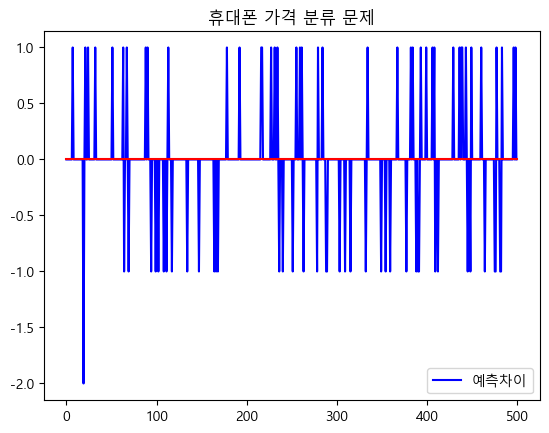

In [111]:
# 학습 모델 평가 및 예측

y_test_index = y_test.reset_index(drop=True)
## 정답, 예측, 차이 테이블, 클래스는 0과 1, 2
## argmax를 막아보고 프린트해보면 predict 성격을 알 수 있음.
y_predict = model.predict(x_test, verbose=0)
y_predict = y_predict.argmax(axis=1)

y_result = np.zeros(y_test.size)
for i in range(y_test.size):
    y_result[i] = y_test_index[i] - y_predict[i]

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plt.title('휴대폰 가격 분류 문제')
plt.plot(y_result, 'b', label='예측차이')
plt.plot([0, y_result.size], [0, 0], 'r')
plt.legend()
plt.show()

In [113]:
score = model.evaluate(x_test, y_test)
print("Test Score", score)

16/16 [==============================] - 0s 803us/step - loss: 0.6566 - accuracy: 0.8360
Test Score [0.6566283702850342, 0.8360000252723694]
